___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://media.geeksforgeeks.org/wp-content/uploads/Dimensionality_Reduction_2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://media.geeksforgeeks.org/wp-content/uploads/Dimensionality_Reduction_2.jpg</p>


### <font color= #2E9AFE> Tema: Reducción de dimensionalidad</font>

La selección de características es diferente a la reducción de dimensionalidad. Ambos métodos buscan reducir la cantidad de atributos en el conjunto de datos, pero un método de reducción de dimensionalidad lo hace creando nuevas combinaciones de atributos, donde los métodos de selección de características incluyen y excluyen atributos presentes en los datos sin cambiarlos.

Ejemplos de métodos de reducción de dimensionalidad incluyen: Análisis de componentes principales y Descomposición de valores singulares.

### Principant Component Analysis 

El PCA usa álgebra lineal para transformar el conjunto de datos en una forma comprimida.

Generalmente, se denomina como técnica de reducción de datos. Una propiedad es que puede elegir el número de dimensiones o componentes principales en el resultado transformado.

In [1]:
#librerías
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True, return_X_y=False)
df = wine_data.data

In [3]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['label'] = wine_data.target

In [5]:
df.shape

(178, 14)

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


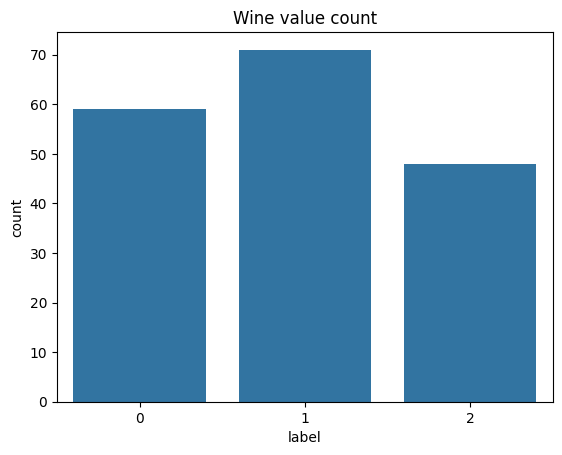

In [7]:
sns.countplot(
    x='label', 
    data=df)
plt.title('Wine value count')
plt.show()

In [8]:
#separar X y Y
X = wine_data.data
y = wine_data.target

### Procesamiento de datos

In [9]:
#Escalar datos 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(X)

### Eligiendo el número de componentes principales

In [10]:
from sklearn.decomposition import PCA
 
#inicializar el objeto
pca = PCA()
#aplicarlo a los datos
pca_fit = pca.fit_transform(x_scaled)
 

In [11]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [12]:
pca_fit

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

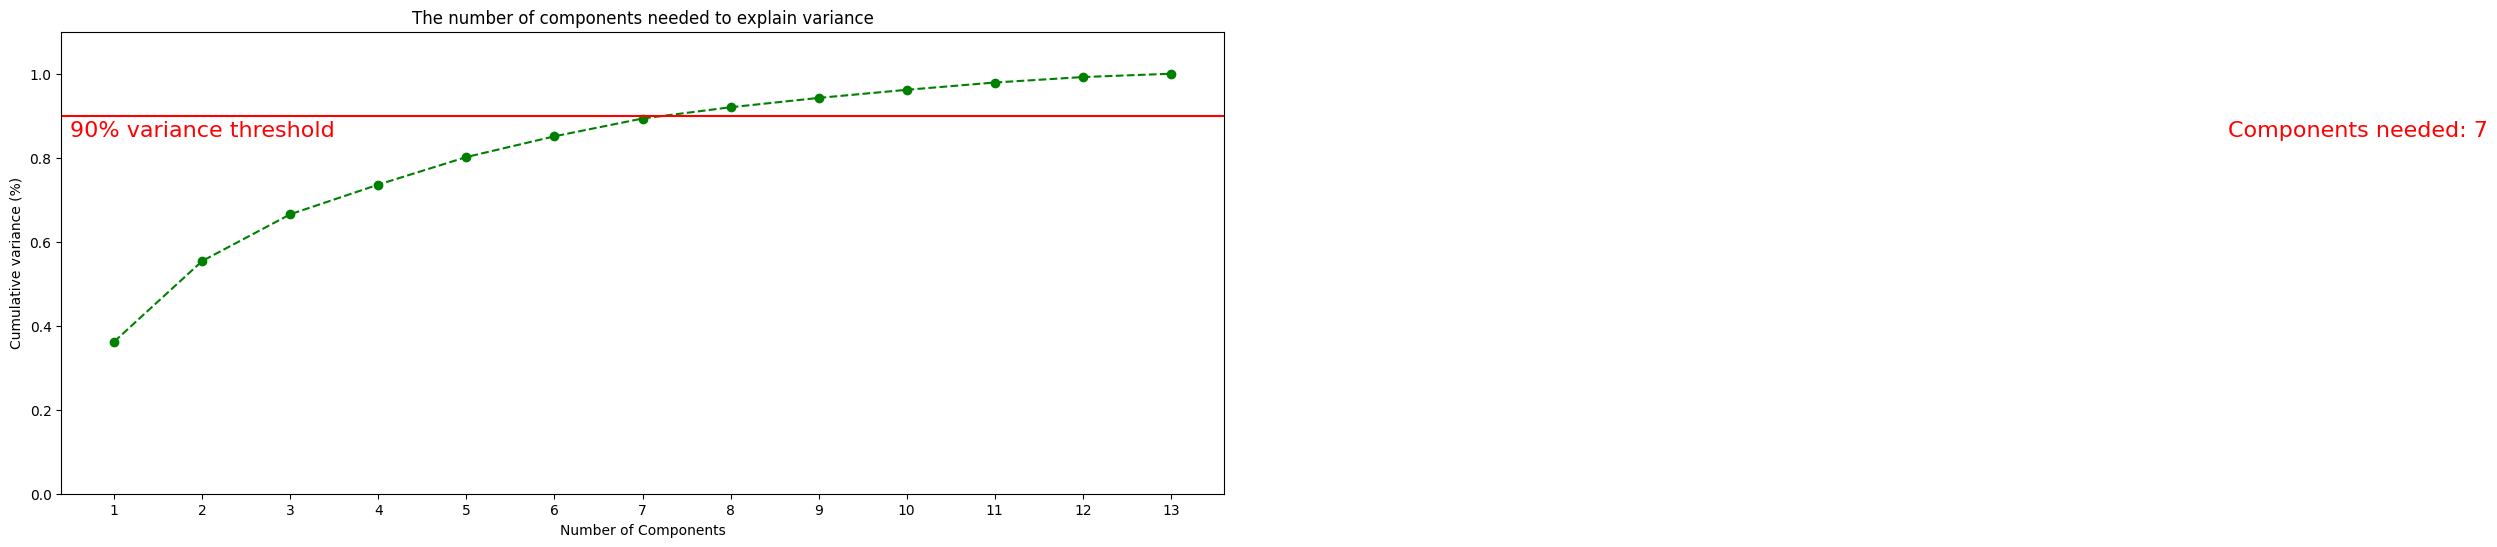

In [13]:
# Graficar la varianza acumulativa de cada componente
plt.figure(figsize = (15, 6))
components = np.arange(1, 14, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% variance threshold', color = 'red', fontsize=16)
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)
plt.show()

El gráfico anterior contiene la varianza acumulada como una proporción en el eje Y y el número de componentes en el eje X.

Utilizando un umbral de variación del 90%, el gráfico anterior nos ayuda a determinar cuántos componentes debemos conservar de nuestro conjunto de datos para que siga teniendo sentido para nosotros en cualquier modelado posterior.

Tenga en cuenta que aquí elegimos el 90% como umbral de variación, pero esta no es una regla de oro. El data scientist elige este umbral de variación.

Entonces, podemos ver en este gráfico que necesitamos 7 componentes para retener el 90% de la variabilidad (información) en nuestros datos. Eso no es una gran mejora con respecto al número total de variables, 13.

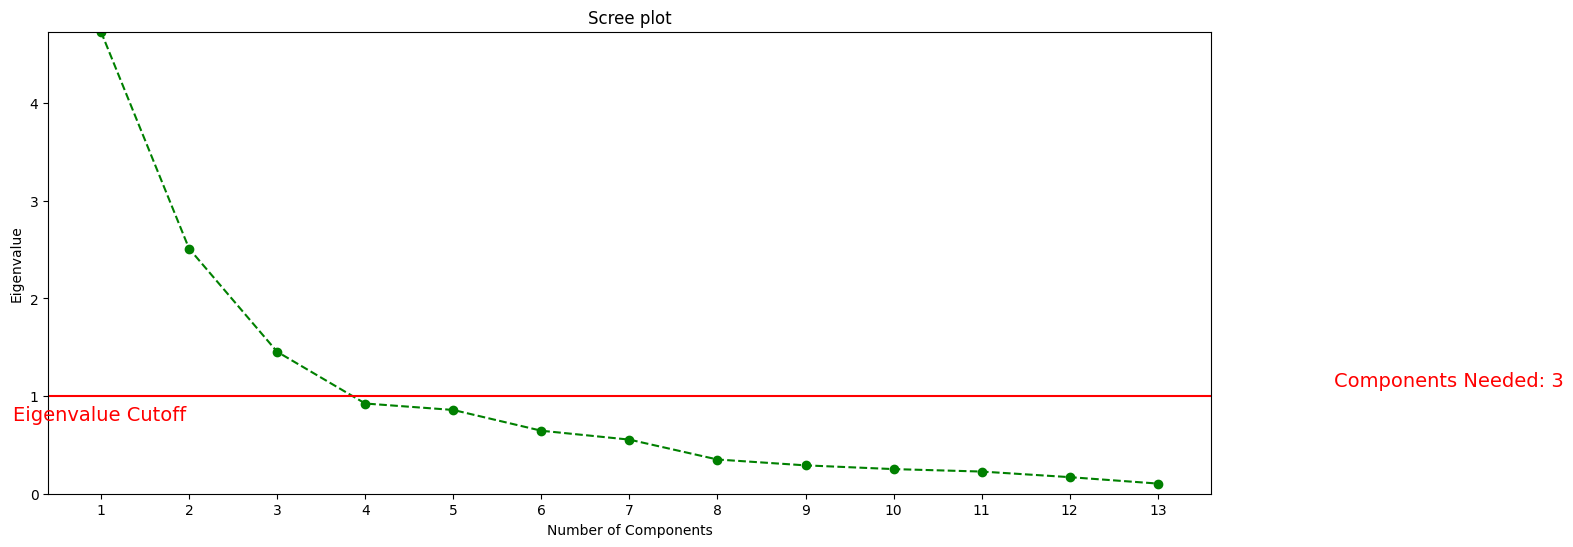

In [14]:
# Scree plot
plt.figure(figsize=(15, 6))
components = np.arange(1, 14, step=1)
eigenvalues = pca.explained_variance_
plt.plot(components, eigenvalues, marker = 'o', 
                 linestyle = '--', color = 'green')
plt.ylim(0, max(eigenvalues))
plt.ylabel('Eigenvalue')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step = 1))
plt.title('Scree plot')
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.text(0, 0.75, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
plt.text(15, 1.10, 'Components Needed: '+str(np.where(eigenvalues<=1)[0][0]), 
                 color = 'red', fontsize=14)
plt.show()

El anterior contiene los eigenvalores en el eje Y y el número de componentes en el eje X.

Como regla general, debemos seleccionar la cantidad de componentes que tienen un valor propio mayor que 1. Según el diagrama anterior, debemos optar por mantener 3 componentes. Esto es muy diferente al gráfico de varianza acumulada anterior donde elegimos retener 7 componentes.

Sin embargo, si optamos por conservar 3 componentes, esto sólo explica el 65% de la variabilidad. Esto es mucho menor que la variabilidad capturada al retener 7 componentes (90%). En este punto, científico de datos tendría que decidir si una variación acumulada del 65 % es satisfactoria en función de su conocimiento del dominio y otras investigaciones en el área.

In [15]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


Observamos que:

- El primer componente principal explica 36% del total de la varianza de los datos.
- El segundo componente principal explica 19% del total de la varianza de los datos.
- El tercer componente principal explica 11% del total de la varianza de los datos.
- El cuarto componente principal explica 7% del total de la varianza de los datos.
- Etc.

Nota: los porcentajes suman 100%

### Aplicando el PCA

In [16]:
from sklearn.decomposition import PCA
 
#inicializar el objeto
pca = PCA(n_components=3)
#aplicarlo a los datos
pca_fit = pca.fit_transform(x_scaled)
datos_pca = pd.DataFrame(pca_fit, columns=['PC1','PC2','PC3'])
datos_pca['y'] = y

In [17]:
datos_pca

,PC1,PC2,PC3,y
0,3.316751,1.443463,-0.165739,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008908,0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,2.216289,-0.342570,2
174,-2.601956,1.757229,0.207581,2
175,-2.677839,2.760899,-0.940942,2
176,-2.387017,2.297347,-0.550696,2


In [18]:
#sin PCA
##Aplicacion de la regresion logística con datos originales
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#inicializar el objeto
logreg = LogisticRegression()
#aplicar la regresión logística a los datos
logreg.fit(x_scaled, y)

#predicciones
y_predict = logreg.predict(x_scaled)
accuracy_score(y,y_predict)


1.0

In [19]:
##Aplicacion de la regresion logística con datos después de aplicar el PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(np.array(datos_pca[['PC1','PC2','PC3']]), y)

y_predict = logreg.predict(datos_pca[['PC1','PC2','PC3']])
accuracy_score(y,y_predict)


c:\Users\sarah\anaconda3\envs\LAB\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9719101123595506

No se aumenta el accuracy con el PCA (fenómeno normal) pero sí reducimos la dimensionalidad de los datos, por lo tanto es menos carga computacional. Con menos información, el clasificador sigue dando muy buenos resultados. 

Si son millones de datos y pocas variables, sí conviene hacer el PCA. También conviene en el caso de tener muchas variables.

### ¿Qué algoritmos se benefician del PCA?

1. Algoritmos lineales. Ya que ayuda a reducir la multicolinealidad
    - Regresión logística
    - Regresión Lineal
2. Máquinas de vector soporte
3. Algoritmos de clustering
4. Redes neuronales

Más información sobre el PCA:

https://towardsdatascience.com/the-most-gentle-introduction-to-principal-component-analysis-9ffae371e93b#:~:text=From%20Wikipedia%2C%20PCA%20is%20a,find%20unmeasured%20%E2%80%9Clatent%20variables%E2%80%9D.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>